In [ ]:
##Take one example as :stroy##10608912.txt

Brad: 3
Columbia: 258
Eddie: 34
Betty Munroe: 1
Everett Scott: 0
Frank N. Furter: 121
Janet Weiss: 6
Magenta: 323
Riff Raff: 84
Ralph Hapschatt: 1
Rocky: 9


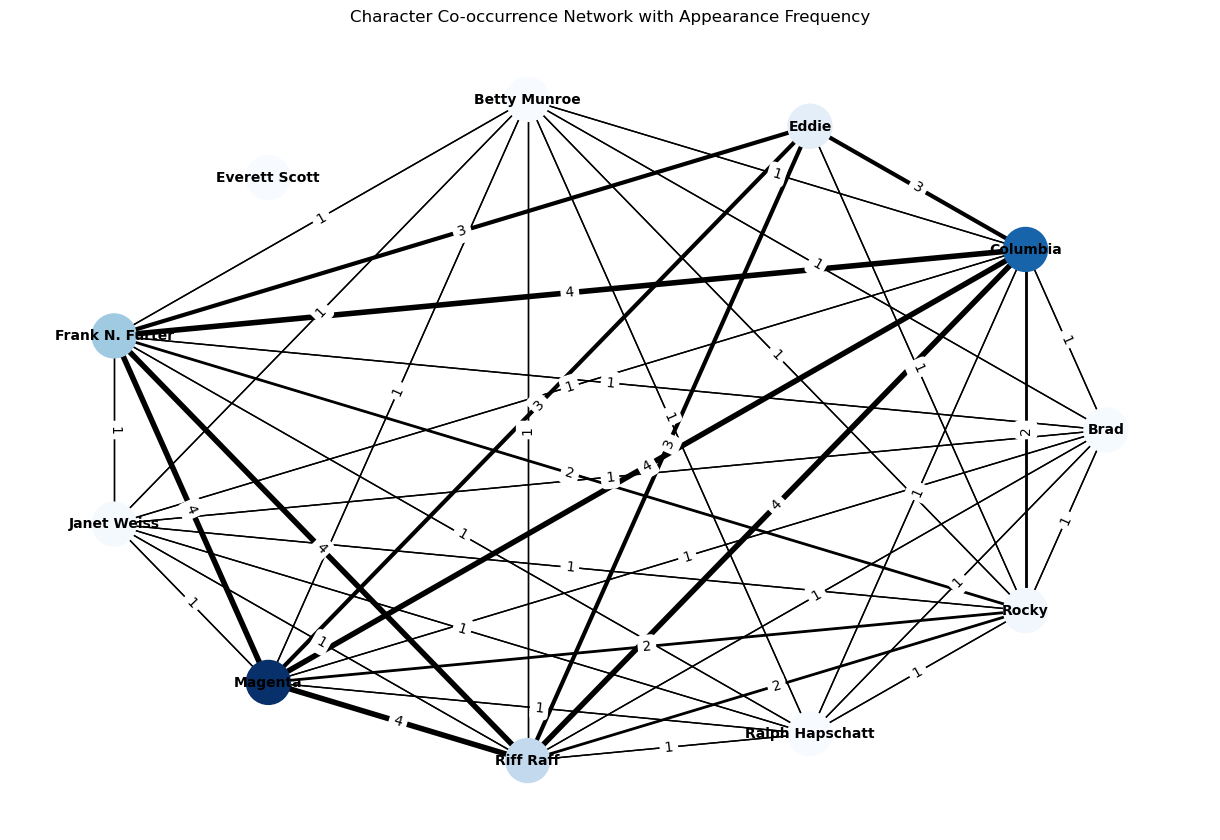


Degree Centrality:
Brad: 0.8000
Columbia: 0.9000
Eddie: 0.5000
Betty Munroe: 0.8000
Everett Scott: 0.0000
Frank N. Furter: 0.9000
Janet Weiss: 0.8000
Magenta: 0.9000
Riff Raff: 0.9000
Ralph Hapschatt: 0.8000
Rocky: 0.9000
Network density: 0.7454545454545455


In [1]:
import pandas as pd ##Import the Pandas library to store data in a dataframe
import networkx as nx ##It is used to build networks and compute network characteristics
import matplotlib.pyplot as plt ##Used for network visualization
import re ##Import regular expressions for splitting sentences
import os ##Used to read files and directories
import json ##Used to parse data in JSON format


##Read the specified file
def read_text(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        return file.read()

##Counts the number of occurrences of each specified character in the text   
def count_character_occurrences(text, names):
    
    ##Counts the number of occurrences of the name in text, stores the result in dictionary occurrences, 
    ##the key is the name, and the value is the number of occurrences
    occurrences = {name: text.count(name) for name in names}
    return occurrences

##Count the number of co-occurrences between characters based on a text window.
def count_cooccurrences(text, names, window_size):
    
    ##Create a DataFrame to record the number of co-occurrences between roles.
    cooccurrence_counts = pd.DataFrame(0, index=names, columns=names)
    text_length = len(text)
    
    ##Slice the text into a window
    windows = [text[i:i+window_size] for i in range(0, text_length, window_size)]
    
    ##Iterate text Window and Calculate Co-occurrence Counts
    for window in windows:
        present_names = [name for name in names if name in window]
        for i in range(len(present_names)):
            for j in range(i+1, len(present_names)):
                name1, name2 = present_names[i], present_names[j]
                cooccurrence_counts.at[name1, name2] += 1
                cooccurrence_counts.at[name2, name1] += 1  

    return cooccurrence_counts

##Read character variants and standard names
with open('character_variants_RHPS.json', 'r', encoding='utf-8') as f:
    variant_to_standard = json.load(f)

##Get a list of role names
names = list(variant_to_standard.keys())

filename = "/users/meinv/Documents/booknlp_for_Ao3/originalwork_txt/10608912.txt"
text = read_text(filename)

##Replace the variant name with the standard name
for variant, standard_name in variant_to_standard.items():
    for variant_name in standard_name:
        text = text.replace(variant_name, variant)

##Count the number of times a role appears        
character_occurrences = count_character_occurrences(text, names)

##Outputs the number of occurrences for each character
for name, count in character_occurrences.items():
    print(f"{name}: {count}")

##Determines the window size to one-quarter of the length of the text
window_size = len(text) // 4 
cooccurrence_counts = count_cooccurrences(text, names, window_size)


##Create a network diagram and add nodes
G = nx.Graph()

max_count = max(character_occurrences.values())
for name, count in character_occurrences.items():
    normalized_count = count / max_count
    G.add_node(name, color=plt.cm.Blues(normalized_count))  

##Add edges
##If the number of co-occurrences is greater than 0, 
##an edge is added to the graph and the number of co-occurrences is used as the weight of the edges
for name1 in names:
    for name2 in names:
        if cooccurrence_counts.at[name1, name2] > 0:
            G.add_edge(name1, name2, weight=cooccurrence_counts.at[name1, name2])

##Draw a network 
pos = nx.circular_layout(G)
plt.figure(figsize=(12, 8))

node_colors = [G.nodes[name]['color'] for name in names]
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1000, font_size=10, font_weight='bold')

for name1, name2, data in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(name1, name2)], width=data['weight'])

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Character Co-occurrence Network with Appearance Frequency')
plt.show()

##Calculate the degree centrality of each node.
degree_centrality = nx.degree_centrality(G)
print("\nDegree Centrality:")
for name, centrality in degree_centrality.items():
    print(f"{name}: {centrality:.4f}")

##Calculate the density of the entire network
density = nx.density(G)
print("Network density:", density)

